# **Recreating different kinds of curves with linear regression**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is a hands on study about how Linear Regression can be used to generate diferent kinds of curves, allowing a simple and fast solution thac can be used to model different kinds of real wolrd problem with good accuracy.

In [2]:
train_data = np.arange(1,100).reshape(-1, 1)

## Starting with a simple linear data

Text(0.5, 1.0, 'Original data')

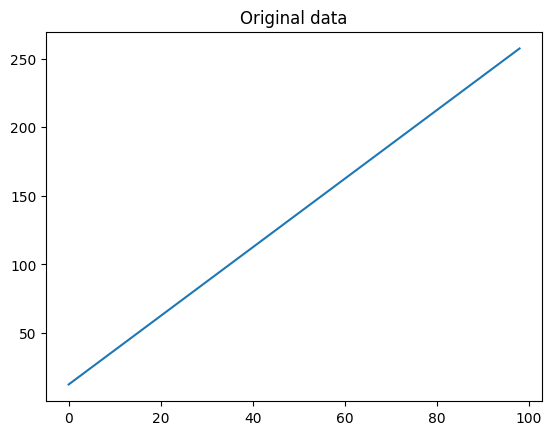

In [3]:
data_linear = np.arange(1,100) * 2.5 + 10
plt.plot(data_linear)
plt.title("Original data")

Text(0.5, 1.0, 'Learned line')

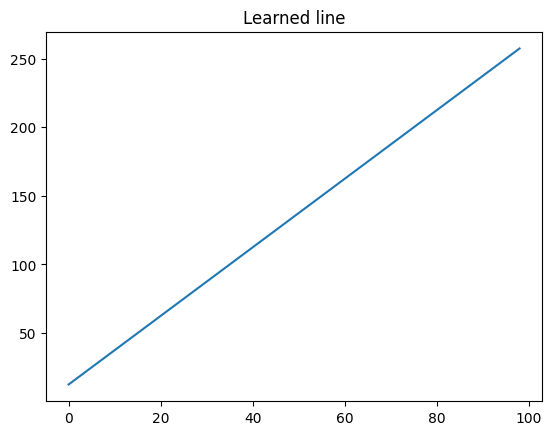

In [4]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data,data_linear)
plt.plot(linear_model.predict(train_data))
plt.title("Learned line")

## 2º Degree polynomium

Text(0.5, 1.0, 'Original data')

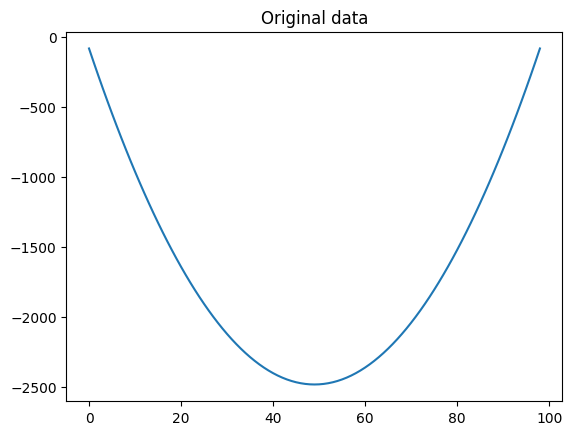

In [5]:
x = np.arange(1,100)
data_2_degree = x ** 2  - x* 100 + 15
plt.plot(data_2_degree)
plt.title("Original data")

In [6]:
train_data_2_dgr = pd.DataFrame({"A":np.arange(1,100) , "B":np.arange(1,100)})
train_data_2_dgr.head()

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


Text(0.5, 1.0, 'Learned curve')

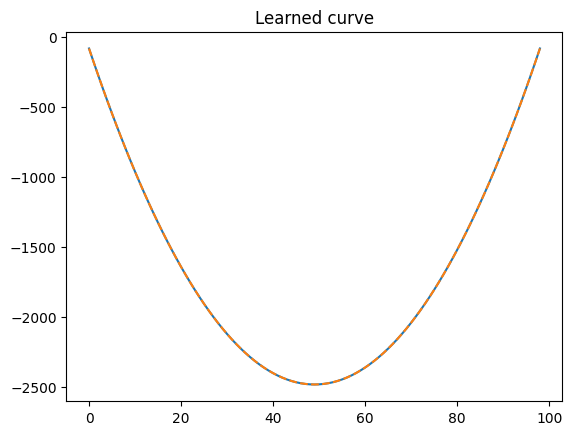

In [7]:
train_data_2_dgr["A"] = train_data_2_dgr["A"] ** 2
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data_2_dgr,data_2_degree)
plt.plot(linear_model.predict(train_data_2_dgr))
plt.plot(data_2_degree,linestyle = "--")
plt.title("Learned curve")

## Sin Cos product curves

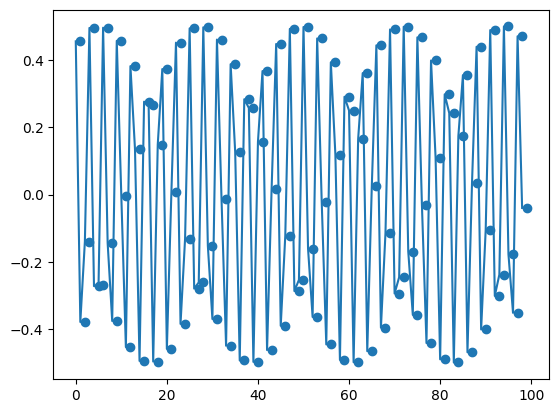

In [8]:
sin_data = ( np.sin(train_data)) * (np.cos(train_data))
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(sin_data)
plt.scatter(train_data ,sin_data)

In [9]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2)

train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data

,const,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...
95,1.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,0.683262,0.730174,0.997799,0.066307
97,1.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,0.379608,-0.925148,-0.702386,0.711796


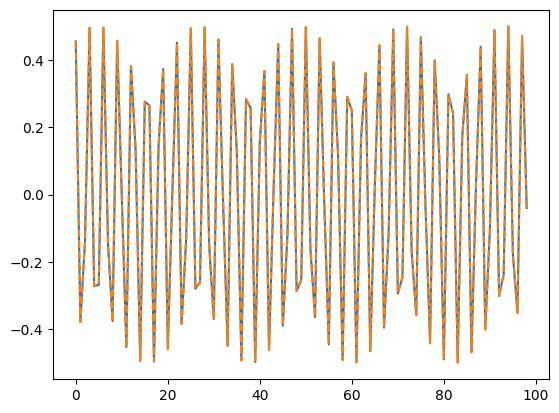

In [10]:
sin_cos_model = LinearRegression(fit_intercept=False)
sin_cos_model.fit(train_sin_cos_data,sin_data)
plt.plot(sin_cos_model.predict(train_sin_cos_data))
plt.plot(sin_data,linestyle = "--")

In [11]:
intercept = sin_cos_model.intercept_
coefficients = sin_cos_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-5.362439946641761e-18 * const) + (1.0547118733938987e-15 * sin(1,6.28)) + (-8.673617379884035e-17 * cos(1,6.28)) + (-0.20807341827357195 * sin(2,6.28)) + (0.45464871341283963 * cos(2,6.28)) +


## log curve

### Simple log curve

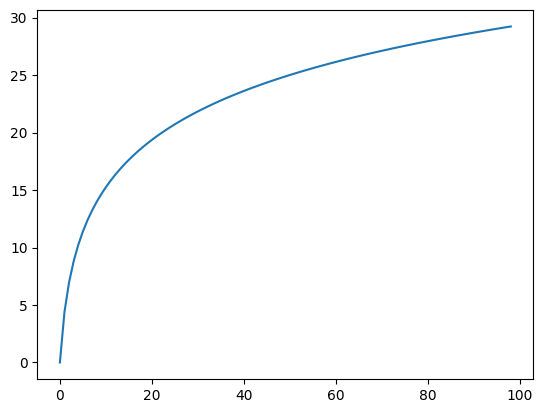

In [12]:
log_data = 3.86 * np.log(train_data) + 2.5 *(np.log(train_data)) 
plt.plot(log_data)

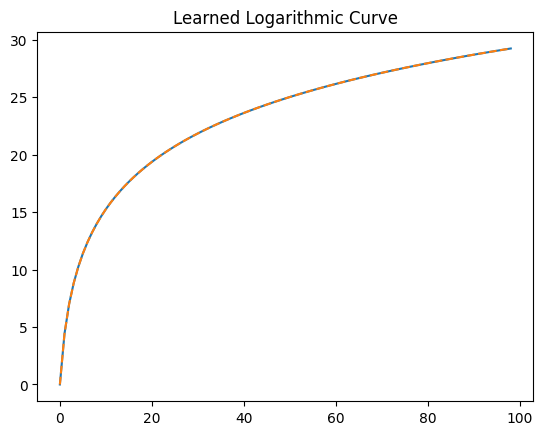

In [13]:
plt.title("Original Logarithmic Data")
# Transform data for linear regression
log_train_data = np.log(train_data)
log_model = LinearRegression(fit_intercept=True)
linear_model.fit(log_train_data, log_data)
log_predictions = linear_model.predict(log_train_data)

plt.plot(log_predictions)
plt.plot(log_data, linestyle="--")
plt.title("Learned Logarithmic Curve")
plt.show()

## Product of logs

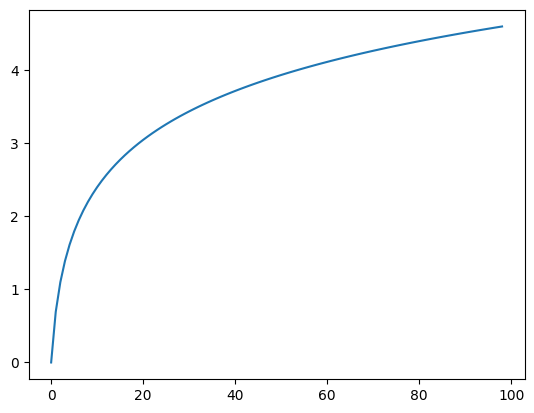

In [14]:
plt.plot(np.log(train_data))

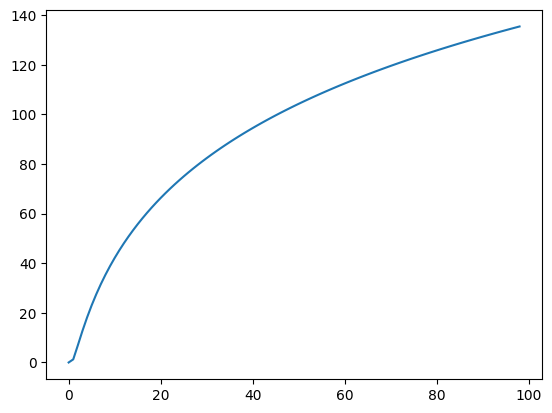

In [15]:
log_prod_data = 3.86 *  np.log(train_data ** 2) * 2.5 * (np.log(np.log(train_data + 1))) 
plt.plot(log_prod_data)

#### **First approach**

Text(0.5, 1.0, 'learned curve')

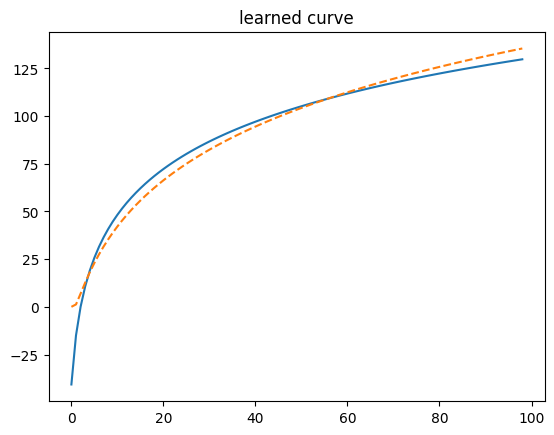

In [16]:
log_prod_train_data = np.log(train_data) 
log_model = LinearRegression(fit_intercept=True)
log_model.fit(log_prod_train_data, log_prod_data)
log_prod_predictions = log_model.predict(log_prod_train_data)

plt.plot(log_prod_predictions)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

#### **Second approach**

In [17]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=2)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,log
1,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,0.693147
3,1.0,3.0,9.0,1.098612
4,1.0,4.0,16.0,1.386294
5,1.0,5.0,25.0,1.609438


Text(0.5, 1.0, 'learned curve')

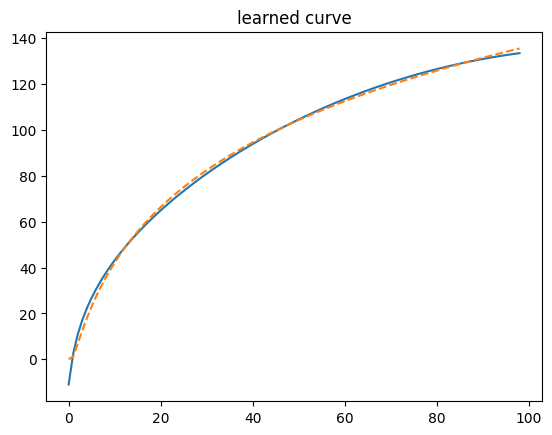

In [18]:

log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

### Including 3 degree polynomium

In [19]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=3)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,log
1,1.0,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,8.0,0.693147
3,1.0,3.0,9.0,27.0,1.098612
4,1.0,4.0,16.0,64.0,1.386294
5,1.0,5.0,25.0,125.0,1.609438


Text(0.5, 1.0, 'learned curve')

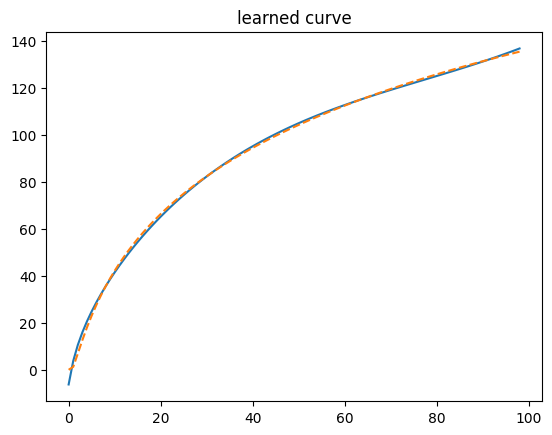

In [20]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

## plynomium only aproximation , 5 degree

In [21]:
dplog = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) ,order = 5)
log_prod_train_data2 = dplog.in_sample()
# log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,trend**4,trend**5
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0
3,1.0,3.0,9.0,27.0,81.0,243.0
4,1.0,4.0,16.0,64.0,256.0,1024.0
5,1.0,5.0,25.0,125.0,625.0,3125.0


Text(0.5, 1.0, 'learned curve')

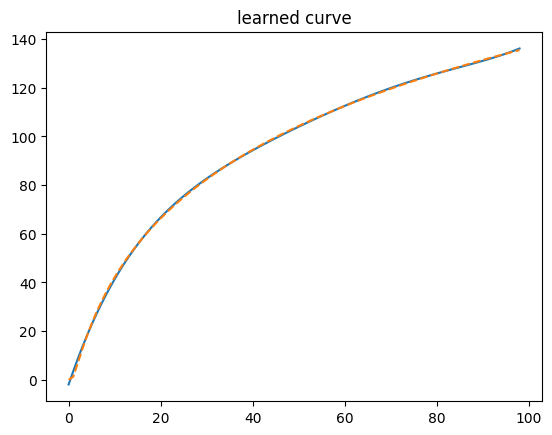

In [22]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

In [23]:
intercept = log_model2.intercept_
coefficients = log_model2.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {log_prod_train_data2.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-7.675674904426817 * const) + (5.9118147161690535 * trend) + (-0.15834558553360809 * trend_squared) + (0.0025888429034758875 * trend_cubed) + (-2.1518721525407014e-05 * trend**4) + (6.998804824576155e-08 * trend**5) +
